# Read data and data preprocessing

In [1]:
import pandas as pd
import numpy as np

# read 
df = pd.read_csv("Spotify_Dataset_V3.csv", delimiter=";")

In [2]:
df = df.drop(columns=['Song URL','# of Nationality','Nationality','Continent'])
print(df.shape)
df.head()

(651936, 16)


Rank            Title                     Artists        Date  \
0     1  Ella Baila Sola  Eslabon Armado, Peso Pluma  29/05/2023   
1     1  Ella Baila Sola  Eslabon Armado, Peso Pluma  29/05/2023   
2     2   WHERE SHE GOES                   Bad Bunny  29/05/2023   
3     3  La Bebe - Remix       Yng Lvcas, Peso Pluma  29/05/2023   
4     3  La Bebe - Remix       Yng Lvcas, Peso Pluma  29/05/2023   

   Danceability  Energy  Loudness  Speechiness  Acousticness  \
0         0.668   0.758   -5176.0        0.033         0.483   
1         0.668   0.758   -5176.0        0.033         0.483   
2         0.652   0.800   -4019.0        0.061         0.143   
3         0.812   0.479   -5678.0        0.333         0.213   
4         0.812   0.479   -5678.0        0.333         0.213   

   Instrumentalness  Valence # of Artist   Artist (Ind.)  Points (Total)  \
0             0.000    0.834    Artist 1  Eslabon Armado             200   
1             0.000    0.834    Artist 2      Peso Pluma             200   
2             0.629    0.234    Artist 1       Bad Bunny             199   
3             0.000    0.559    Artist 1       Yng Lvcas             198   
4             0.000    0.559    Artist 2      Peso Pluma             198   

   Points (Ind for each Artist/Nat)                      id  
0                             100.0  3qQbCzHBycnDpGskqOWY0E  
1                             100.0  3qQbCzHBycnDpGskqOWY0E  
2                             199.0  7ro0hRteUMfnOioTFI5TG1  
3                              99.0  2UW7JaomAMuX9pZrjVpHAU  
4                              99.0  2UW7JaomAMuX9pZrjVpHAU

## Select the columns to be deleted

In [3]:
columns_to_consider = ['id', 'Title', 'Date', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence']

df = df.drop_duplicates(subset=columns_to_consider)
df

Rank                          Title                     Artists  \
0          1                Ella Baila Sola  Eslabon Armado, Peso Pluma   
2          2                 WHERE SHE GOES                   Bad Bunny   
3          3                La Bebe - Remix       Yng Lvcas, Peso Pluma   
5          4              Cupid - Twin Ver.                 FIFTY FIFTY   
6          5                      un x100to   Grupo Frontera, Bad Bunny   
...      ...                            ...                         ...   
651930   196                  White Iverson                 Post Malone   
651931   197                        Oh Lord                   MiC LOWRY   
651932   198  Superstition - Single Version               Stevie Wonder   
651933   199                        Secrets                  The Weeknd   
651934   200                Ni**as In Paris           JAY-Z, Kanye West   

              Date  Danceability  Energy  Loudness  Speechiness  Acousticness  \
0       29/05/2023         0.668   0.758   -5176.0        0.033         0.483   
2       29/05/2023         0.652   0.800   -4019.0        0.061         0.143   
3       29/05/2023         0.812   0.479   -5678.0        0.333         0.213   
5       29/05/2023         0.783   0.592   -8332.0        0.033         0.435   
6       29/05/2023         0.569   0.724   -4076.0        0.047         0.228   
...            ...           ...     ...       ...          ...           ...   
651930  01/01/2017         0.675   0.562   -7678.0        0.035         0.233   
651931  01/01/2017         0.273   0.794   -6644.0        0.068         0.022   
651932  01/01/2017         0.650   0.658  -10908.0        0.085         0.089   
651933  01/01/2017         0.665   0.771   -5779.0        0.053         0.016   
651934  01/01/2017         0.757   0.882   -6125.0        0.248         0.076   

        Instrumentalness  Valence # of Artist   Artist (Ind.)  Points (Total)  \
0                  0.000    0.834    Artist 1  Eslabon Armado             200   
2                  0.629    0.234    Artist 1       Bad Bunny             199   
3                  0.000    0.559    Artist 1       Yng Lvcas             198   
5                  0.000    0.726    Artist 1     FIFTY FIFTY             197   
6                  0.000    0.562    Artist 1  Grupo Frontera             196   
...                  ...      ...         ...             ...             ...   
651930             0.000    0.309    Artist 1     Post Malone               5   
651931             0.000    0.377    Artist 1       MiC LOWRY               4   
651932             0.004    0.883    Artist 1   Stevie Wonder               3   
651933             0.000    0.764    Artist 1      The Weeknd               2   
651934             0.000    0.684    Artist 1           JAY-Z               1   

        Points (Ind for each Artist/Nat)                      id  
0                                  100.0  3qQbCzHBycnDpGskqOWY0E  
2                                  199.0  7ro0hRteUMfnOioTFI5TG1  
3                                   99.0  2UW7JaomAMuX9pZrjVpHAU  
5                                  197.0  7FbrGaHYVDmfr7KoLIZnQ7  
6                                   98.0  6pD0ufEQq0xdHSsRbg9LBK  
...                                  ...                     ...  
651930                               5.0  6eT7xZZlB2mwyzJ2sUKG6w  
651931                               4.0  1sTUEdVO85YU8Ymk2jeAls  
651932                               3.0  5lXcSvHRVjQJ3LB2rLKQog  
651933                               2.0  3DX4Y0egvc0slLcLl31h2p  
651934                               1.0  2KpCpk6HjXXLb7nnXoXA5O  

[468746 rows x 16 columns]

## PCA

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns


# Select feature columns
features = df[['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence']]

# Standardizing Data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

Exception in thread Thread-5 (_readerthread):
Traceback (most recent call last):
  File "d:\Program Files\anaconda3\Lib\threading.py", line 1073, in _bootstrap_inner
    self.run()
  File "C:\Users\19093\AppData\Roaming\Python\Python312\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "d:\Program Files\anaconda3\Lib\threading.py", line 1010, in run
    self._target(*self._args, **self._kwargs)
  File "d:\Program Files\anaconda3\Lib\subprocess.py", line 1599, in _readerthread
    buffer.append(fh.read())
                  ^^^^^^^^^
  File "<frozen codecs>", line 322, in decode
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 28: invalid start byte
d:\Program Files\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
'NoneType' object has no attribute 'splitlines'
Returning the number of logical cores instead. You

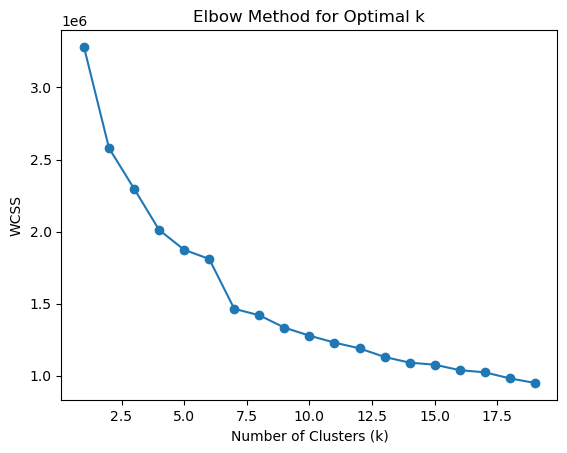

In [5]:
wcss = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow
plt.plot(range(1, 20), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

kmeans = KMeans(n_clusters=5, random_state=42)
df['Genre'] = kmeans.fit_predict(features_scaled)

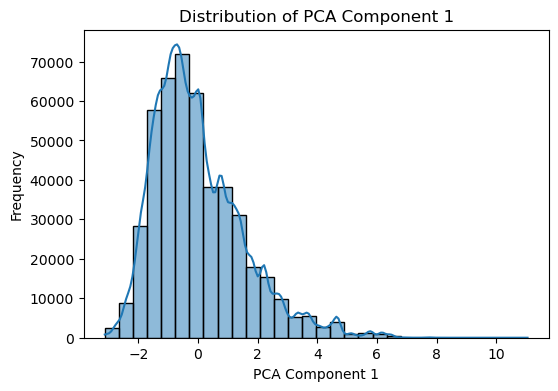

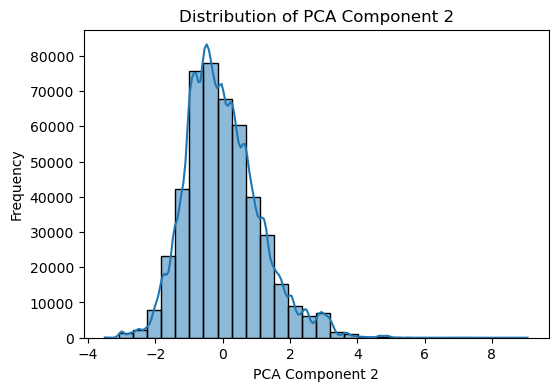

In [6]:
# Use PCA to reduce the data to two dimensions
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

pca_df = pd.DataFrame(features_pca, columns=['PCA Component 1', 'PCA Component 2'])
for column in pca_df.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(pca_df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

## Using Gaussian distribution to filter discrete values

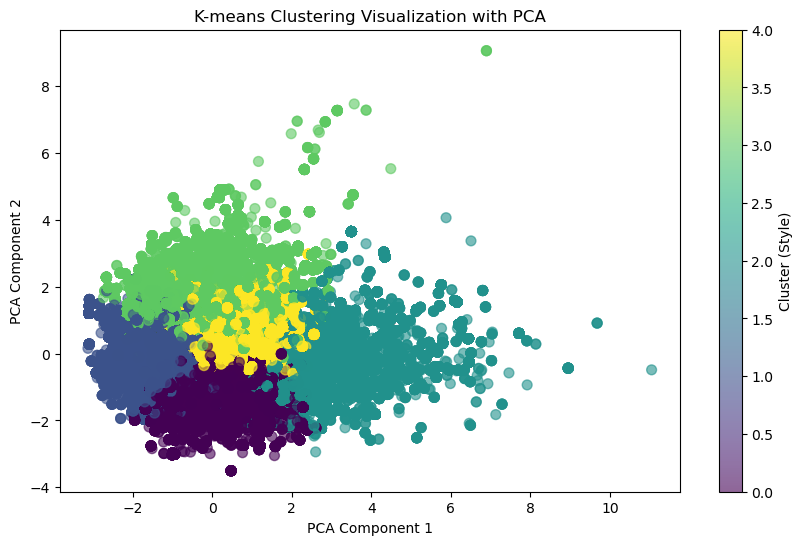

(459485, 17)


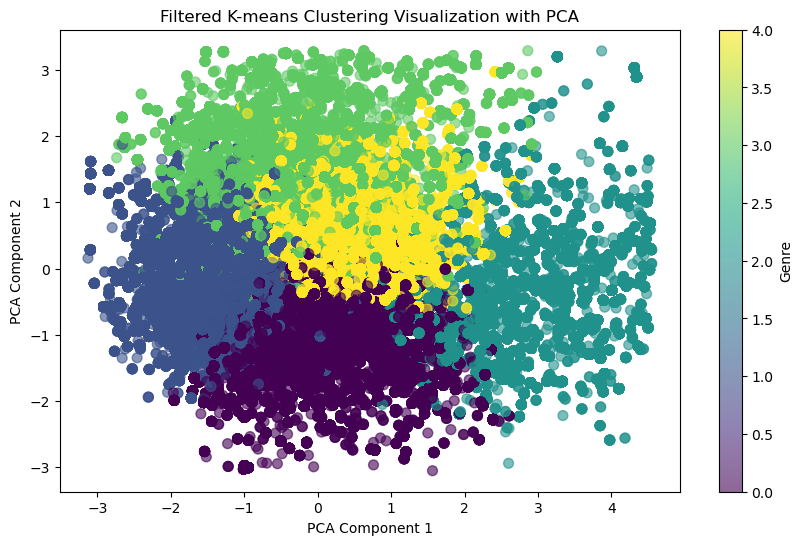

In [7]:
# Draw a scatter plot of the clustering results
plt.figure(figsize=(10, 6))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=df['Genre'], cmap='viridis', s=50, alpha=0.6)
plt.colorbar(label='Cluster (Style)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering Visualization with PCA')
plt.show()


# Calculate the mean and standard deviation of the features after dimensionality reduction
mean_pca = np.mean(features_pca, axis=0)
std_pca = np.std(features_pca, axis=0)

# Set a threshold (e.g. 3 standard deviations)
threshold = 3

# Calculate the z-score for each point
z_scores = np.abs((features_pca - mean_pca) / std_pca)

# Filter out discrete points
outliers = (z_scores > threshold).any(axis=1)
non_outliers = ~outliers
filtered_data = features_pca[~outliers]
filtered_clusters = df['Genre'][non_outliers]
df = df[non_outliers].reset_index(drop=True)
print(df.shape)

# Visualize the data after removing discrete points
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data[:, 0], filtered_data[:, 1], c=filtered_clusters, cmap='viridis', s=50, alpha=0.6)
plt.colorbar(label='Genre')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Filtered K-means Clustering Visualization with PCA')
plt.show()

In [8]:
df

Rank                          Title                     Artists  \
0          1                Ella Baila Sola  Eslabon Armado, Peso Pluma   
1          2                 WHERE SHE GOES                   Bad Bunny   
2          3                La Bebe - Remix       Yng Lvcas, Peso Pluma   
3          4              Cupid - Twin Ver.                 FIFTY FIFTY   
4          5                      un x100to   Grupo Frontera, Bad Bunny   
...      ...                            ...                         ...   
459480   196                  White Iverson                 Post Malone   
459481   197                        Oh Lord                   MiC LOWRY   
459482   198  Superstition - Single Version               Stevie Wonder   
459483   199                        Secrets                  The Weeknd   
459484   200                Ni**as In Paris           JAY-Z, Kanye West   

              Date  Danceability  Energy  Loudness  Speechiness  Acousticness  \
0       29/05/2023         0.668   0.758   -5176.0        0.033         0.483   
1       29/05/2023         0.652   0.800   -4019.0        0.061         0.143   
2       29/05/2023         0.812   0.479   -5678.0        0.333         0.213   
3       29/05/2023         0.783   0.592   -8332.0        0.033         0.435   
4       29/05/2023         0.569   0.724   -4076.0        0.047         0.228   
...            ...           ...     ...       ...          ...           ...   
459480  01/01/2017         0.675   0.562   -7678.0        0.035         0.233   
459481  01/01/2017         0.273   0.794   -6644.0        0.068         0.022   
459482  01/01/2017         0.650   0.658  -10908.0        0.085         0.089   
459483  01/01/2017         0.665   0.771   -5779.0        0.053         0.016   
459484  01/01/2017         0.757   0.882   -6125.0        0.248         0.076   

        Instrumentalness  Valence # of Artist   Artist (Ind.)  Points (Total)  \
0                  0.000    0.834    Artist 1  Eslabon Armado             200   
1                  0.629    0.234    Artist 1       Bad Bunny             199   
2                  0.000    0.559    Artist 1       Yng Lvcas             198   
3                  0.000    0.726    Artist 1     FIFTY FIFTY             197   
4                  0.000    0.562    Artist 1  Grupo Frontera             196   
...                  ...      ...         ...             ...             ...   
459480             0.000    0.309    Artist 1     Post Malone               5   
459481             0.000    0.377    Artist 1       MiC LOWRY               4   
459482             0.004    0.883    Artist 1   Stevie Wonder               3   
459483             0.000    0.764    Artist 1      The Weeknd               2   
459484             0.000    0.684    Artist 1           JAY-Z               1   

        Points (Ind for each Artist/Nat)                      id  Genre  
0                                  100.0  3qQbCzHBycnDpGskqOWY0E      1  
1                                  199.0  7ro0hRteUMfnOioTFI5TG1      0  
2                                   99.0  2UW7JaomAMuX9pZrjVpHAU      3  
3                                  197.0  7FbrGaHYVDmfr7KoLIZnQ7      4  
4                                   98.0  6pD0ufEQq0xdHSsRbg9LBK      0  
...                                  ...                     ...    ...  
459480                               5.0  6eT7xZZlB2mwyzJ2sUKG6w      4  
459481                               4.0  1sTUEdVO85YU8Ymk2jeAls      0  
459482                               3.0  5lXcSvHRVjQJ3LB2rLKQog      4  
459483                               2.0  3DX4Y0egvc0slLcLl31h2p      1  
459484                               1.0  2KpCpk6HjXXLb7nnXoXA5O      3  

[459485 rows x 17 columns]

# Exploratory data analysis

In [9]:
# According to the analysis in our report, we give each cluster a corresponding 
# genre name based on the different musical characteristics of different clusters.
df = df.rename(columns={'Genre': 'Genre'})
genre_mapping = {
    0: 'Rock or Alternative',
    1: 'Dance or Electronic',
    2: 'Jazz or Classical',
    3: 'Hip-hop or Rap',
    4: 'Pop or R&B'
}
df['Genre'] = df['Genre'].replace(genre_mapping)

In [10]:
df

Rank                          Title                     Artists  \
0          1                Ella Baila Sola  Eslabon Armado, Peso Pluma   
1          2                 WHERE SHE GOES                   Bad Bunny   
2          3                La Bebe - Remix       Yng Lvcas, Peso Pluma   
3          4              Cupid - Twin Ver.                 FIFTY FIFTY   
4          5                      un x100to   Grupo Frontera, Bad Bunny   
...      ...                            ...                         ...   
459480   196                  White Iverson                 Post Malone   
459481   197                        Oh Lord                   MiC LOWRY   
459482   198  Superstition - Single Version               Stevie Wonder   
459483   199                        Secrets                  The Weeknd   
459484   200                Ni**as In Paris           JAY-Z, Kanye West   

              Date  Danceability  Energy  Loudness  Speechiness  Acousticness  \
0       29/05/2023         0.668   0.758   -5176.0        0.033         0.483   
1       29/05/2023         0.652   0.800   -4019.0        0.061         0.143   
2       29/05/2023         0.812   0.479   -5678.0        0.333         0.213   
3       29/05/2023         0.783   0.592   -8332.0        0.033         0.435   
4       29/05/2023         0.569   0.724   -4076.0        0.047         0.228   
...            ...           ...     ...       ...          ...           ...   
459480  01/01/2017         0.675   0.562   -7678.0        0.035         0.233   
459481  01/01/2017         0.273   0.794   -6644.0        0.068         0.022   
459482  01/01/2017         0.650   0.658  -10908.0        0.085         0.089   
459483  01/01/2017         0.665   0.771   -5779.0        0.053         0.016   
459484  01/01/2017         0.757   0.882   -6125.0        0.248         0.076   

        Instrumentalness  Valence # of Artist   Artist (Ind.)  Points (Total)  \
0                  0.000    0.834    Artist 1  Eslabon Armado             200   
1                  0.629    0.234    Artist 1       Bad Bunny             199   
2                  0.000    0.559    Artist 1       Yng Lvcas             198   
3                  0.000    0.726    Artist 1     FIFTY FIFTY             197   
4                  0.000    0.562    Artist 1  Grupo Frontera             196   
...                  ...      ...         ...             ...             ...   
459480             0.000    0.309    Artist 1     Post Malone               5   
459481             0.000    0.377    Artist 1       MiC LOWRY               4   
459482             0.004    0.883    Artist 1   Stevie Wonder               3   
459483             0.000    0.764    Artist 1      The Weeknd               2   
459484             0.000    0.684    Artist 1           JAY-Z               1   

        Points (Ind for each Artist/Nat)                      id  \
0                                  100.0  3qQbCzHBycnDpGskqOWY0E   
1                                  199.0  7ro0hRteUMfnOioTFI5TG1   
2                                   99.0  2UW7JaomAMuX9pZrjVpHAU   
3                                  197.0  7FbrGaHYVDmfr7KoLIZnQ7   
4                                   98.0  6pD0ufEQq0xdHSsRbg9LBK   
...                                  ...                     ...   
459480                               5.0  6eT7xZZlB2mwyzJ2sUKG6w   
459481                               4.0  1sTUEdVO85YU8Ymk2jeAls   
459482                               3.0  5lXcSvHRVjQJ3LB2rLKQog   
459483                               2.0  3DX4Y0egvc0slLcLl31h2p   
459484                               1.0  2KpCpk6HjXXLb7nnXoXA5O   

                      Genre  
0       Dance or Electronic  
1       Rock or Alternative  
2            Hip-hop or Rap  
3                Pop or R&B  
4       Rock or Alternative  
...                     ...  
459480           Pop or R&B  
459481  Rock or Alternative  
459482           Pop or R&B  
459483  Dance or Electronic  
459484       H

## Demonstrate musical characteristics of different music genres

In [11]:
cluster_characteristics = df.groupby('Genre')[['Danceability', 'Energy', 'Loudness', 'Speechiness', 
                                                 'Acousticness', 'Instrumentalness', 'Valence']].mean()
print(cluster_characteristics)

                     Danceability    Energy     Loudness  Speechiness  \
Genre                                                                   
Dance or Electronic      0.747473  0.754278 -3688.942739     0.082366   
Hip-hop or Rap           0.734111  0.628750 -5910.092886     0.305196   
Jazz or Classical        0.528063  0.419775 -7546.066938     0.057832   
Pop or R&B               0.776477  0.542914 -7129.651286     0.084010   
Rock or Alternative      0.582097  0.684415 -4991.073024     0.063593   

                     Acousticness  Instrumentalness   Valence  
Genre                                                          
Dance or Electronic      0.165495          0.001889  0.704452  
Hip-hop or Rap           0.206158          0.003719  0.482767  
Jazz or Classical        0.646948          0.033013  0.321288  
Pop or R&B               0.257264          0.005006  0.486125  
Rock or Alternative      0.117468          0.007194  0.343734  


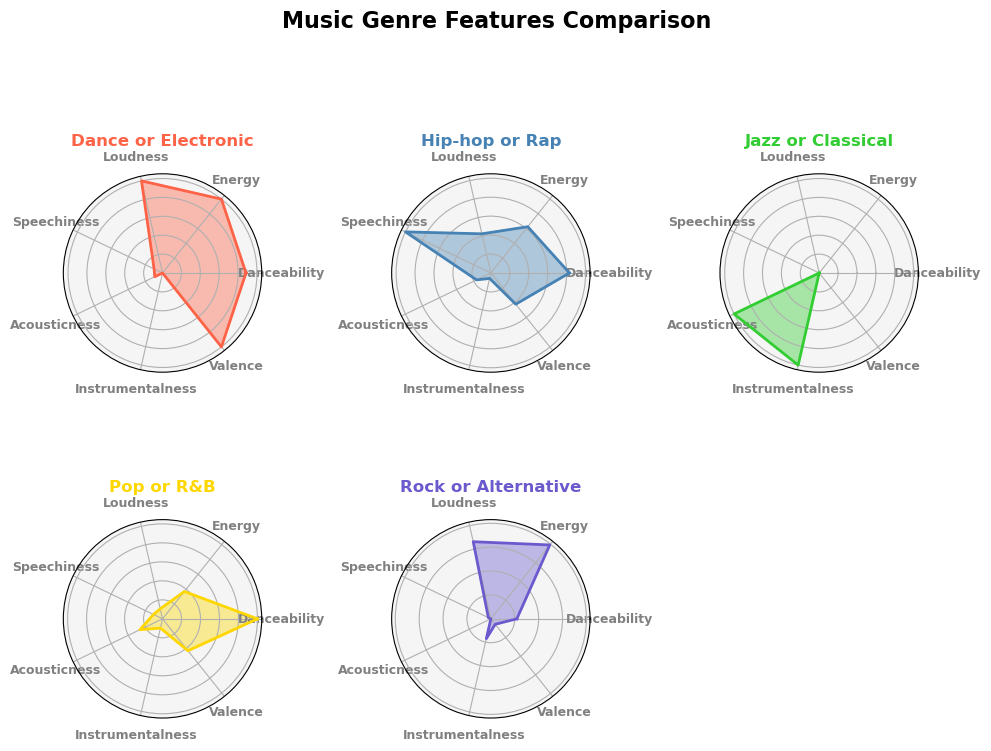

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Update the name of the data frame
music_features_df = {
    'Genre': ['Dance or Electronic', 'Hip-hop or Rap', 'Jazz or Classical', 'Pop or R&B', 'Rock or Alternative'],
    'Danceability': [0.747473, 0.734111, 0.528063, 0.776477, 0.582097],
    'Energy': [0.754278, 0.628750, 0.419775, 0.542914, 0.684415],
    'Loudness': [-3688.942739, -5910.092886, -7546.066938, -7129.651286, -4991.073024],
    'Speechiness': [0.082366, 0.305196, 0.057832, 0.084010, 0.063593],
    'Acousticness': [0.165495, 0.206158, 0.646948, 0.257264, 0.117468],
    'Instrumentalness': [0.001889, 0.003719, 0.033013, 0.005006, 0.007194],
    'Valence': [0.704452, 0.482767, 0.321288, 0.486125, 0.343734]
}

df_music = pd.DataFrame(music_features_df)

# Normalize the data
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df_music.iloc[:, 1:])
df_music_normalized = pd.DataFrame(normalized_data, columns=df_music.columns[1:])

# Add back the Genre column
df_music_normalized['Genre'] = df_music['Genre']

categories = list(df_music_normalized.columns[:-1])
N = len(categories)
colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#6A5ACD']  # Custom color palette

plt.figure(figsize=(10, 8))

for index, row in df_music_normalized.iterrows():
    values = row.values[:-1].tolist()
    values += values[:1]

    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]

    ax = plt.subplot(2, 3, index + 1, polar=True)
    ax.set_facecolor('#F5F5F5')
    plt.xticks(angles[:-1], categories, color='grey', size=9, fontweight='bold')
    ax.plot(angles, values, linewidth=2, linestyle='solid', color=colors[index])
    ax.fill(angles, values, color=colors[index], alpha=0.4)
    ax.set_yticklabels([])
    plt.title(row['Genre'], size=12, color=colors[index], y=1.1, fontweight='bold')

plt.suptitle('Music Genre Features Comparison', size=16, color='black', fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.85)

plt.show()


## Shows the popularity of different music genres by year

In [13]:
# Convert date to year
df['Year'] = pd.to_datetime(df['Date'], dayfirst=True).dt.year

# Calculate the total score for each pseudo-style each year and convert it into a ratio
genre_trends = df.groupby(['Year', 'Genre'])['Points (Total)'].sum().unstack().fillna(0)

# Calculate the total score for each year
yearly_totals = genre_trends.sum(axis=1)

# Divide the score of each pseudo-style by the total score of the year to get the ratio
genre_trends_ratio = genre_trends.div(yearly_totals, axis=0)

print(genre_trends_ratio)

Genre  Dance or Electronic  Hip-hop or Rap  Jazz or Classical  Pop or R&B  \
Year                                                                        
2017              0.371339        0.129716           0.049695    0.199947   
2018              0.318146        0.151481           0.071080    0.209363   
2019              0.328152        0.175376           0.089726    0.236068   
2020              0.335561        0.169406           0.111024    0.216559   
2021              0.366855        0.103604           0.139338    0.206825   
2022              0.340680        0.113119           0.119052    0.159051   
2023              0.319792        0.102039           0.134299    0.156070   

Genre  Rock or Alternative  
Year                        
2017              0.249303  
2018              0.249930  
2019              0.170678  
2020              0.167450  
2021              0.183378  
2022              0.268098  
2023              0.287800  


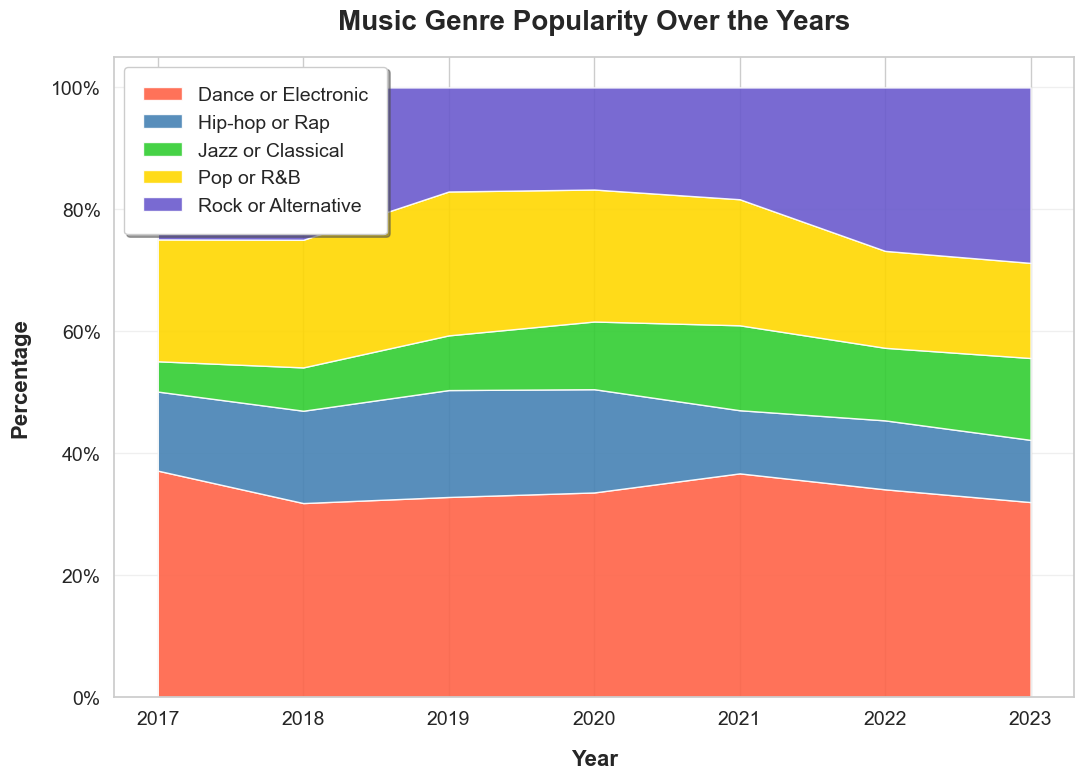

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as mticker
import seaborn as sns

# New updated data
data = {
    'Year': [2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'Dance or Electronic': [0.371339, 0.318146, 0.328152, 0.335561, 0.366855, 0.340680, 0.319792],
    'Hip-hop or Rap': [0.129716, 0.151481, 0.175376, 0.169406, 0.103604, 0.113119, 0.102039],
    'Jazz or Classical': [0.049695, 0.071080, 0.089726, 0.111024, 0.139338, 0.119052, 0.134299],
    'Pop or R&B': [0.199947, 0.209363, 0.236068, 0.216559, 0.206825, 0.159051, 0.156070],
    'Rock or Alternative': [0.249303, 0.249930, 0.170678, 0.167450, 0.183378, 0.268098, 0.287800]
}

music_genre_popularity = pd.DataFrame(data)
music_genre_popularity.set_index('Year', inplace=True)

# Set Seaborn style
sns.set_theme(style="whitegrid")

# Plotting the stacked area chart
fig, ax = plt.subplots(figsize=(12, 8))
colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#6A5ACD']
ax.stackplot(music_genre_popularity.index, music_genre_popularity.T, labels=music_genre_popularity.columns, colors=colors, alpha=0.9)

# Chart enhancements
ax.set_xlabel('Year', fontsize=16, labelpad=15, weight='bold')
ax.set_ylabel('Percentage', fontsize=16, labelpad=15, weight='bold')
ax.set_title('Music Genre Popularity Over the Years', fontsize=20, weight='bold', pad=20)

# Setting font size for tick labels
ax.tick_params(axis='both', which='major', labelsize=14)

# Setting Y-axis to percentage format
y_format = mticker.PercentFormatter(xmax=1, decimals=0)
ax.yaxis.set_major_formatter(y_format)

# Adding grid lines for readability
ax.grid(axis='y', linestyle='-', alpha=0.3)

# Setting the legend
ax.legend(loc='upper left', fontsize=14, frameon=True, fancybox=True, shadow=True, borderpad=1)

# Adjusting chart layout and aesthetics
fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Display the chart
plt.show()
